In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
data =pd.read_csv('http://www.stat.ucla.edu/~handcock/216/datasets/BINARYEX/binary.csv')

In [4]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [6]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Text(0.5, 0, 'GPA')

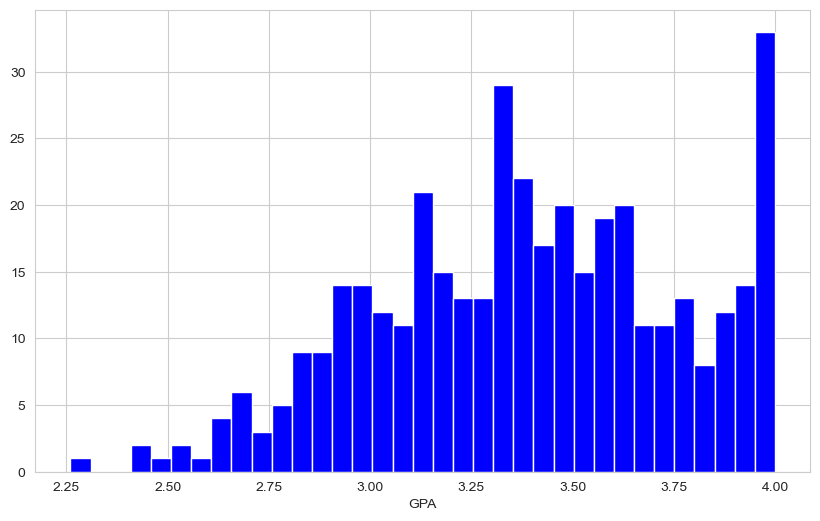

In [7]:
plt.figure(figsize=(10,6))
plt.hist(data['gpa'], bins=35, color='blue')
plt.xlabel('GPA')

Text(0.5, 0, 'GPA')

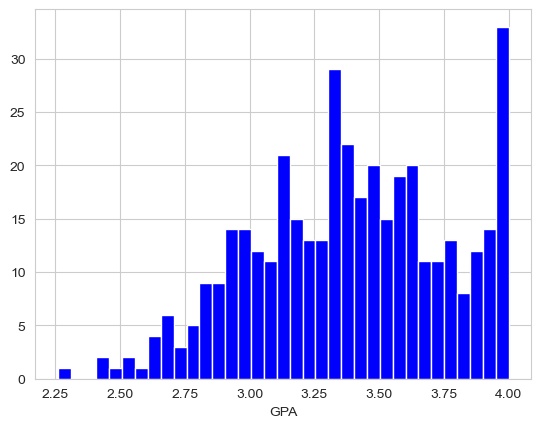

In [8]:
data['gpa'].hist(bins=35,color='blue')
plt.xlabel('GPA')

Text(0.5, 0, 'gre score')

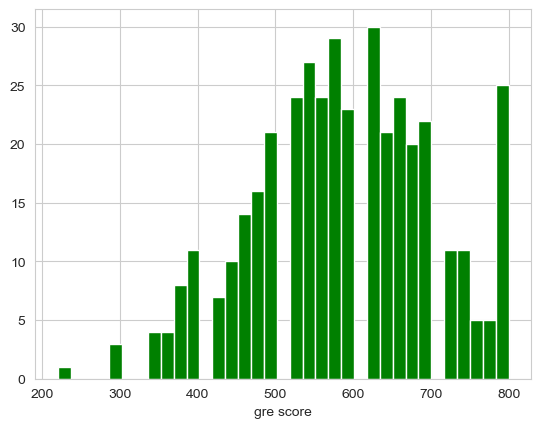

In [9]:
plt.hist(data['gre'],bins=35,color='green')
plt.xlabel('gre score')

<Axes: >

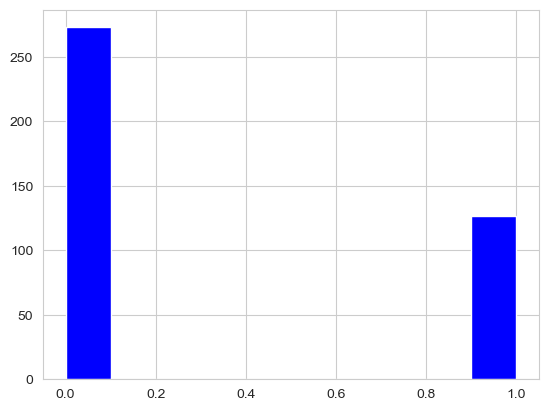

In [10]:
data['admit'].hist(color='blue')

<Axes: >

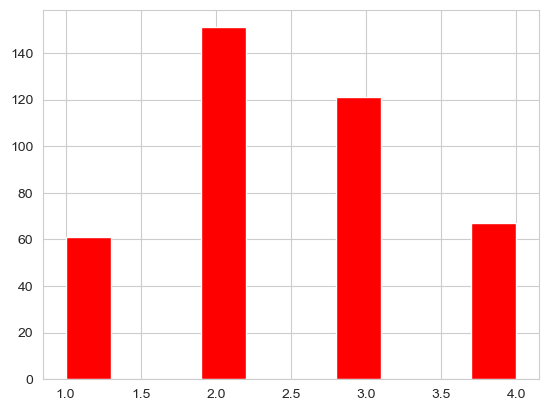

In [11]:
data['rank'].hist(color='red')

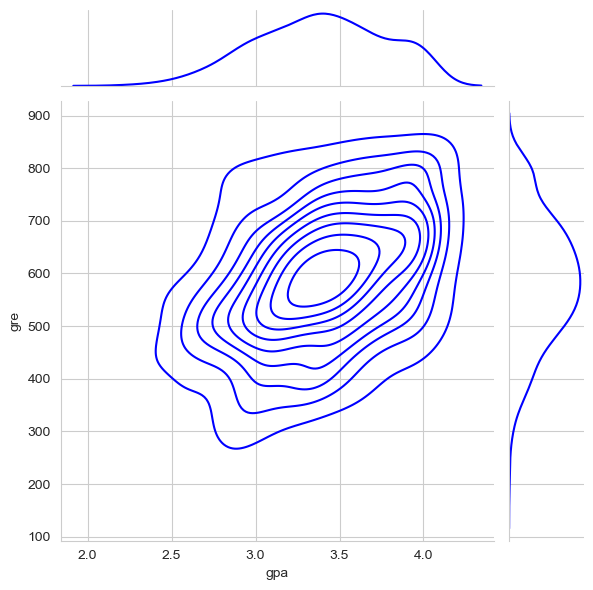

In [12]:
sns.jointplot(x='gpa',y='gre', data= data,color ='blue',kind='kde')

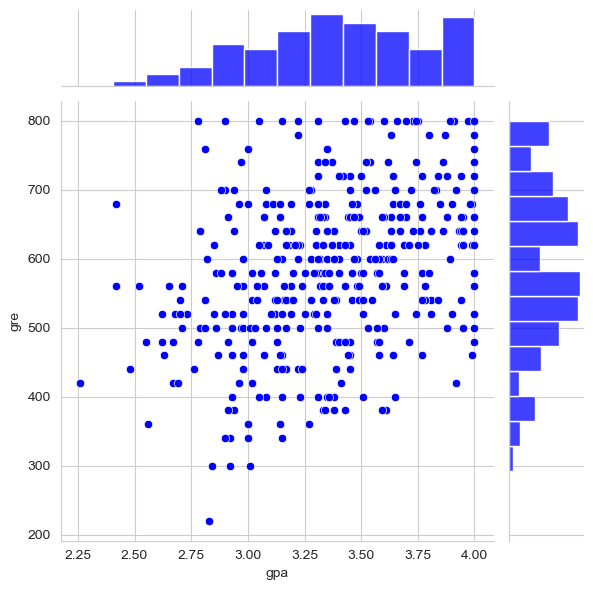

In [13]:
sns.jointplot(x='gpa',y='gre', data= data,color ='blue')

In [16]:
data=data.fillna(0)


In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,solver='liblinear')

In [19]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [22]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [23]:
pred=model.predict(X_test)

In [24]:
np.array(model.predict(X_train)-y_train)

array([-1, -1, -2,  0, -1,  2, -1,  0,  0,  0,  0,  1,  0, -2,  0,  0, -1,
        2,  0, -1, -1, -1,  1,  1, -1,  0,  0,  1, -1,  1, -2,  0,  1,  0,
        1, -2,  0, -2,  0, -1,  0, -2,  0,  0,  1, -1, -2,  1, -1,  2,  0,
        1,  1,  0,  1,  0,  1, -1,  0, -1, -1,  0,  0,  0, -1, -2, -1,  1,
       -2,  0,  1,  0, -2, -2,  0,  0,  0,  0,  1,  0, -1, -2,  0,  1,  1,
        1, -1,  0,  1, -1, -1,  0,  1,  0, -2, -1,  0,  0, -1,  0,  1, -1,
        0,  0,  1,  0,  0,  0,  2,  0, -1, -2, -1,  1, -1, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -2, -2,  0, -2, -1,  1, -1,
        1, -2,  1, -1, -1,  1,  0,  0,  0, -1,  0, -1,  1,  0,  0, -1, -2,
        0,  0,  1, -1,  0,  1,  1, -1,  0, -2,  0,  0,  1,  0, -1,  0, -1,
        1,  0,  1, -1, -2, -1,  0,  1,  0,  2,  0,  1,  0,  0,  2,  0, -1,
       -1, -1,  0,  0,  0,  1,  0,  0,  2,  1,  1, -1, -1,  0,  0, -1,  0,
        1, -2,  0, -1, -1,  0,  1, -1, -2, -1,  0,  0,  1,  0,  0,  1,  0,
        0,  0, -1,  1,  0

In [25]:
model.score(X_train,y_train)

0.4083333333333333

array([[0, 7, 2, 0],
       [0, 9, 3, 0],
       [0, 7, 3, 0],
       [0, 8, 1, 0]], dtype=int64)

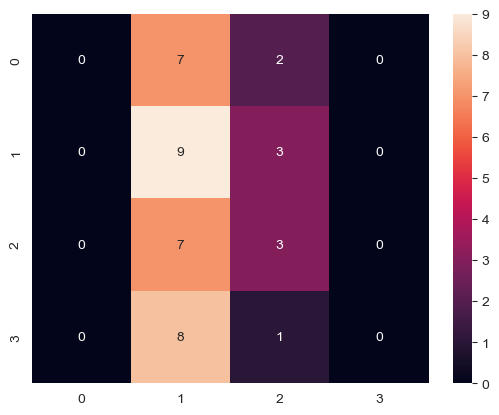

In [26]:

mat=confusion_matrix(y_test,pred)

sns.heatmap(mat.astype(int),annot=True)
mat

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, pred, zero_division=1,average='macro')
recall = recall_score(y_test, pred, zero_division=1,average='macro')
f1 = f1_score(y_test,pred, zero_division=1,average='macro')

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.29      0.75      0.42        12
           3       0.33      0.30      0.32        10
           4       0.00      0.00      0.00         9

    accuracy                           0.30        40
   macro avg       0.16      0.26      0.18        40
weighted avg       0.17      0.30      0.20        40



c:\Users\Tejpratap\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tejpratap\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tejpratap\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
